# Wordcloud #

In [1]:
import numpy as np, pandas as pd, seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import json

import nltk, nltk.sentiment, sklearn
import collections
from collections import Counter
import PyPDF2
import requests

import os

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams

basedir = r'C:\Users\sebag\Documents\GitHub\SDS Group 35\Exam_Project\Minutes_PDF'
testdir = r'C:\Users\sebag\Documents\GitHub\Exam\Test folder'

Matplotlib is building the font cache using fc-list. This may take a moment.


ModuleNotFoundError: No module named 'wordcloud'

In [2]:
url = 'https://raw.githubusercontent.com/MatPiq/SDS-Group-35/master/Exam_Project/bow_ny.csv'

neu_df = pd.read_csv(url, delimiter = ';')
neu_words = set(neu_df['Word'])
len(neu_words)

1093

In [3]:
#Preprocessing - tokenize and lower case pdf-strings

tokenizer = nltk.tokenize.TweetTokenizer()
def preprocessing(string):
    string = string.lower()
    string = tokenizer.tokenize(string)
    return string

#Apply positive/negative sets on pdf-string

def apply_dictionary(document_elem, dictionary):
    lst = []
    for word in document_elem:
        if (word in dictionary):
            lst.append(word)
    return [lst]

#PDF extractor script. Creates a list separated per page.

def pdf_extractor(path):
    pdf_file = open(path, 'rb')
    read_pdf = PyPDF2.PdfFileReader(pdf_file)
    number_of_pages = read_pdf.getNumPages()
    c = collections.Counter(range(number_of_pages))
    res1 = []
    for i in range(len(c)):
        page = read_pdf.getPage(i)
        page_content = page.extractText()
        res1.append(page_content)
    return res1


In [57]:
# Make sure to use the right file path!
# The function returns a dictionary containing: {file name: list of every word in the file}
# PDFs is compatible for the dic_wordcounting function

def PDF_str(path):
    i = 0
    docs = []
    file_names = []
    for fn in os.listdir(path):
        print('Now treating file: ' + fn + '\nDocument no.: ' + str(i+1))
        doc = pdf_extractor(path + ('/' if path[:3] == 'http' else '\\') + fn)
        doc = pd.Series([''.join(doc)])
        doc = doc.apply(preprocessing)
        i += 1

        docs.append(doc[0])
        file_names.append(fn)
        
    file_dict = dict(zip(file_names, docs))
    # print(type(docs))
    return file_dict

PDFs = PDF_str(basedir)

Now treating file: ppp000203e.pdf
Document no.: 1


Now treating file: ppp000322e.pdf
Document no.: 2
Now treating file: ppp000504e.pdf
Document no.: 3
Now treating file: ppp000607e.pdf
Document no.: 4
Now treating file: ppp000706e.pdf
Document no.: 5
Now treating file: ppp000816e.pdf
Document no.: 6
Now treating file: ppp001024e.pdf
Document no.: 7
Now treating file: ppp001220e.pdf
Document no.: 8
Now treating file: ppp010201e.pdf
Document no.: 9
Now treating file: ppp010326e.pdf
Document no.: 10
Now treating file: ppp010426e.pdf
Document no.: 11
Now treating file: ppp010530e.pdf
Document no.: 12
Now treating file: ppp010614e.pdf
Document no.: 13
Now treating file: ppp010705e.pdf
Document no.: 14
Now treating file: ppp010823e.pdf
Document no.: 15
Now treating file: ppp010917e.pdf
Document no.: 16
Now treating file: ppp011015e.pdf
Document no.: 17
Now treating file: ppp011108e.pdf
Document no.: 18
Now treating file: ppp011204e.pdf
Document no.: 19
Now treating file: ppp020207e.pdf
Document no.: 20
Now treating file: ppp020318e.pdf
Docum

In [45]:
with open(r'C:\Users\sebag\Documents\GitHub\SDS Group 35\Exam_Project\PDFs.json') as f:
    PDFs = json.load(f)

In [46]:
len(PDFs)

135

In [7]:
def neu_count(neu, PDF_dl):
    neu_words = []
    i = 0
    error = []
    
    for words in PDF_dl.values():
        try:
            neu_words.append(apply_dictionary(words, neu))
            error.append(False)

            i += 1

            #date = re.findall(r'\d+', fn)
        except KeyError:
            neu_words.append(np.NaN)
            error.append(True)
            i += 1
        
    df = pd.DataFrame(neu_words)
    return df

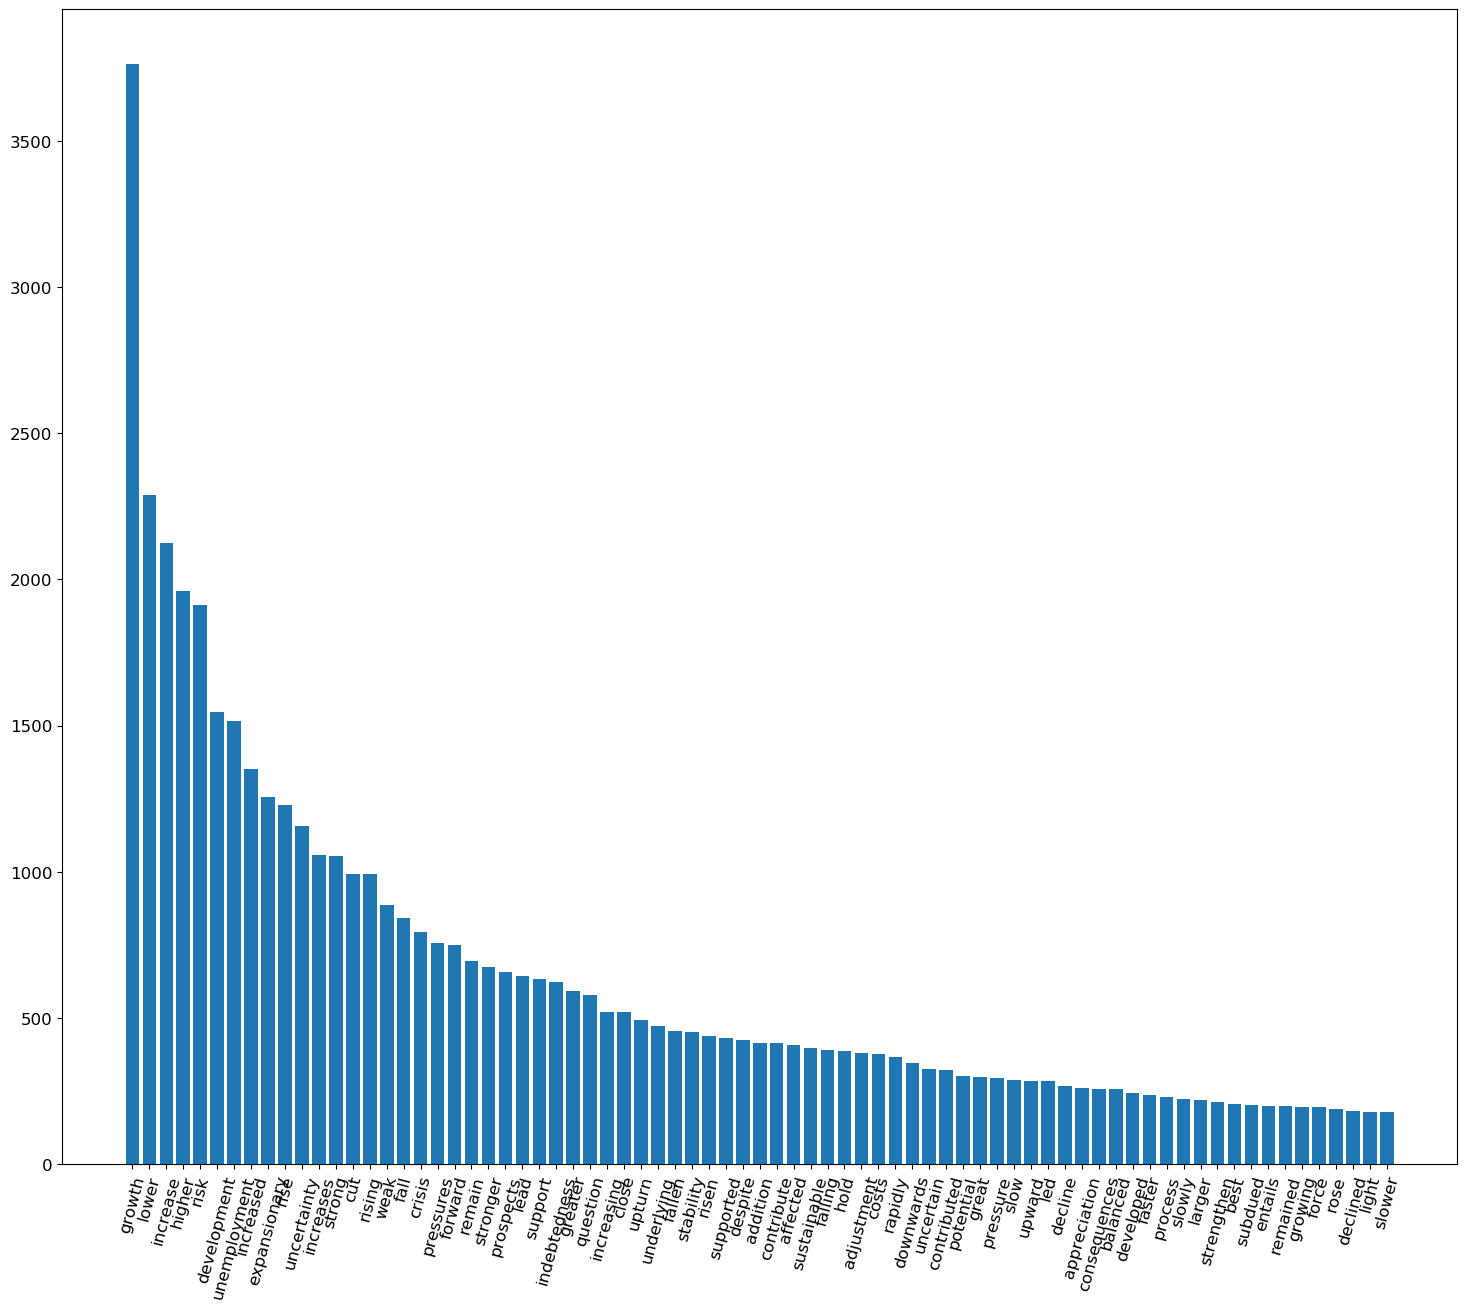

{'growth': 3762, 'lower': 2288, 'increase': 2123, 'higher': 1959, 'risk': 1914, 'development': 1545, 'unemployment': 1516, 'increased': 1350, 'expansionary': 1255, 'rise': 1228, 'uncertainty': 1156, 'increases': 1058, 'strong': 1054, 'cut': 994, 'rising': 993, 'weak': 886, 'fall': 841, 'crisis': 793, 'pressures': 756, 'forward': 748, 'remain': 695, 'stronger': 674, 'prospects': 658, 'lead': 645, 'support': 632, 'indebtedness': 624, 'greater': 593, 'question': 579, 'increasing': 521, 'close': 519, 'upturn': 494, 'underlying': 474, 'fallen': 454, 'stability': 453, 'risen': 437, 'supported': 430, 'despite': 425, 'addition': 415, 'contribute': 413, 'affected': 409, 'sustainable': 397, 'falling': 391, 'hold': 386, 'adjustment': 381, 'costs': 376, 'rapidly': 368, 'downwards': 345, 'uncertain': 327, 'contributed': 321, 'potential': 300, 'great': 297, 'pressure': 294, 'slow': 288, 'upward': 284, 'led': 284, 'decline': 269, 'appreciation': 259, 'consequences': 257, 'balanced': 256, 'developed':

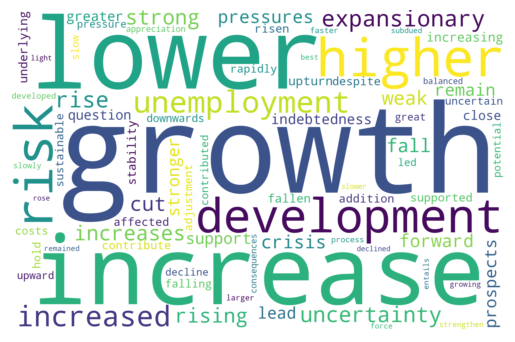

In [55]:
# Takes inputs:
    # - lexicon: A set of words, which will be applied on the PDF-files
    # - PDF_dl: Dictionary. Created for the purpose to treat PDFs
    # - n: (int) The n most common words will be added to the dictionary
    # - Word_Cloud: If a wordcloud is wanted, write: 1, as input. Creates a wordcloud with n words based on the frequency
# Returns:
    # - A dictionary containing the n most common words as keys, and the frequency of the word as values

def dic_wordcounting(lexicon, PDF_dl, n, Word_Cloud):
    
    wordc_df = neu_count(lexicon, PDF_dl)
    
    wordc_dic = Counter([])
    for elem in wordc_df[0]:
        a = Counter(elem)
        wordc_dic = wordc_dic + a
        
    wordc_dic = dict(sorted(wordc_dic.items(), key = lambda x: x[1], reverse = True))
    
    wordc_lst = list(wordc_dic.items())
    del wordc_lst[n:]
    wordc_dic = dict(wordc_lst)
    
    
    plt.style.use('default')
    plt.rcParams.update({'font.size': 12})
    plt.rcParams['lines.markersize'] = 4
    plt.figure(figsize=(18, 15))
    
    plt.bar(range(len(wordc_dic)), list(wordc_dic.values()), align='center')
    plt.xticks(range(len(wordc_dic)), list(wordc_dic.keys()), rotation = 75)
    plt.show()
    #plt.savefig('Frequency_neu_words.png')
    
    print(wordc_dic)
    
    if Word_Cloud == 1:
        wc = WordCloud(background_color="white",width=2000,height=1300,relative_scaling=0.5,normalize_plurals=False, random_state = 2).generate_from_frequencies(wordc_dic)
        
        plt.axis("off")
        plt.figure
        plt.imshow(wc, interpolation='bilinear')
        plt.savefig('Wordcloud_basic_n75.png')
        plt.show()
    return wordc_dic

count_dict = dic_wordcounting(neu_words, PDFs, 75, 1)

In [6]:
wordc_dic = Counter([])
for elem in wordc_df[0]:
    a = Counter(elem)
    wordc_dic = wordc_dic + a

wordc_dic = dict(sorted(wordc_dic.items(), key = lambda x: x[1], reverse = True))

n = 75

wordc_lst = list(wordc_dic.items())
del wordc_lst[n:]
wordc_dic = dict(wordc_lst)

print(wordc_dic)

{'growth': 3762, 'lower': 2288, 'increase': 2123, 'higher': 1959, 'risk': 1914, 'development': 1545, 'unemployment': 1516, 'increased': 1350, 'expansionary': 1255, 'rise': 1228, 'uncertainty': 1156, 'increases': 1058, 'strong': 1054, 'cut': 994, 'rising': 993, 'weak': 886, 'fall': 841, 'crisis': 793, 'pressures': 756, 'forward': 748, 'remain': 695, 'stronger': 674, 'prospects': 658, 'lead': 645, 'support': 632, 'indebtedness': 624, 'greater': 593, 'question': 579, 'increasing': 521, 'close': 519, 'upturn': 494, 'underlying': 474, 'fallen': 454, 'stability': 453, 'risen': 437, 'supported': 430, 'despite': 425, 'addition': 415, 'contribute': 413, 'affected': 409, 'sustainable': 397, 'falling': 391, 'hold': 386, 'adjustment': 381, 'costs': 376, 'rapidly': 368, 'downwards': 345, 'uncertain': 327, 'contributed': 321, 'potential': 300, 'great': 297, 'pressure': 294, 'slow': 288, 'upward': 284, 'led': 284, 'decline': 269, 'appreciation': 259, 'consequences': 257, 'balanced': 256, 'developed':

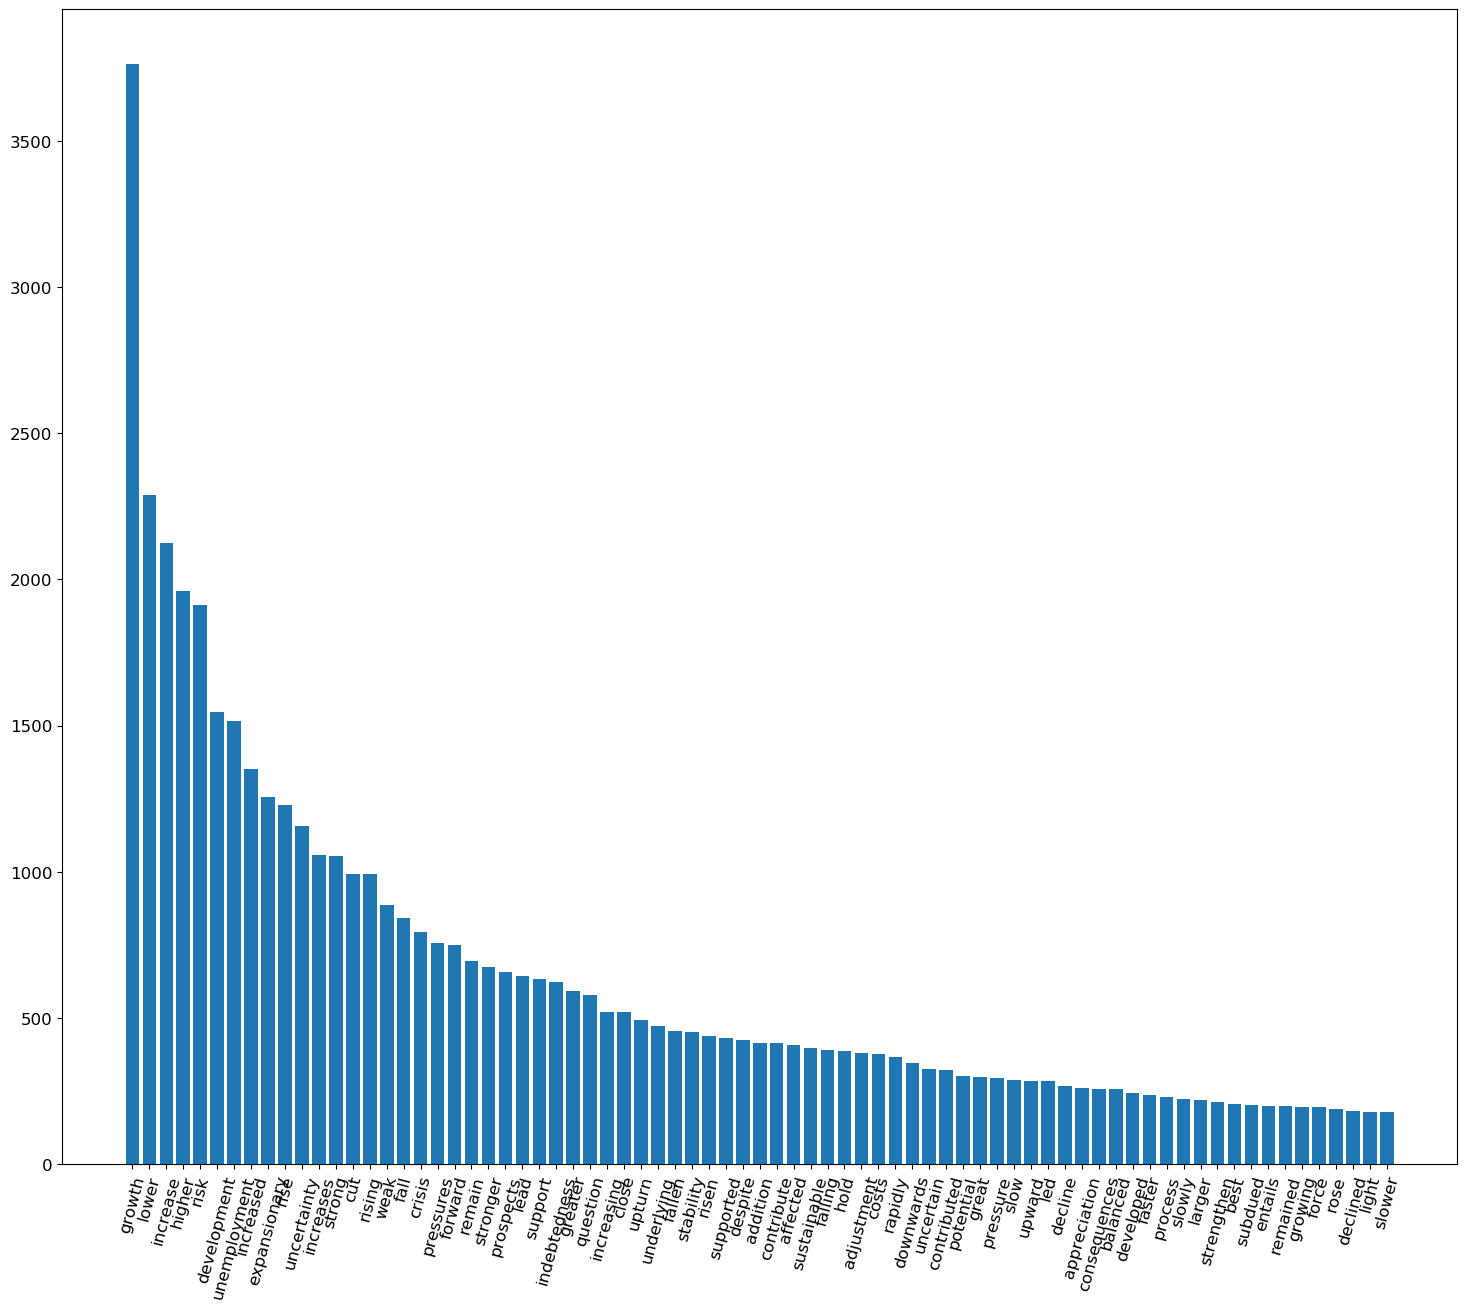

In [54]:
plt.style.use('default')
plt.rcParams.update({'font.size': 12})
plt.rcParams['lines.markersize'] = 4
plt.figure(figsize=(18, 15))

plt.bar(range(len(count_dict)), list(count_dict.values()), align='center')
plt.xticks(range(len(count_dict)), list(count_dict.keys()), rotation = 75)
plt.savefig('Frequency_neu_words.png')
plt.show()

(-0.5, 1279.5, 719.5, -0.5)

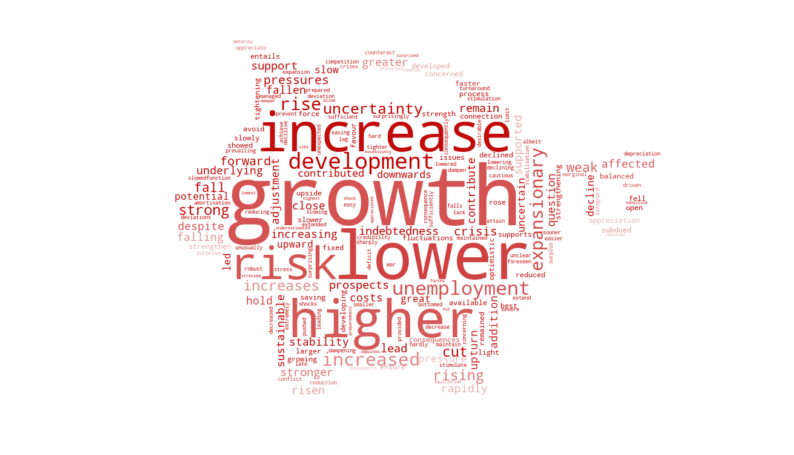

In [39]:
wc_mask = np.array(Image.open(r'C:\Users\sebag\Documents\GitHub\Wordcloud_test_red.png').convert('RGB'))
#wc_mask = np.array(Image.open(r'C:\Users\sebag\Documents\GitHub\SDS Group 35\sveriges_riksbank_2_png.png').convert('RGB'))

wc = WordCloud(background_color="white",\
               width=2000,height=1300,\
               relative_scaling=0.5,\
               normalize_plurals=False, random_state=2, mask = wc_mask).generate_from_frequencies(count_dict)

image_colors = ImageColorGenerator(wc_mask)

plt.figure(figsize = [10, 10])
plt.imshow(wc.recolor(color_func = image_colors), interpolation = 'bilinear')
plt.axis("off")
#plt.savefig('Wordcloud_piggybank_red.png')
